# Introduction

The purpose of this analysis is to analyze the total number of deaths Worldwide. Various regions delimited by the World Health Organization (WHO) will be compared.

For this analysis, we used the Kaggle dataset, available at: https://www.kaggle.com/datasets/madhurpant/world-deaths-and-causes-1990-2019
<br>
<br>
Links used in this analysis:

 - https://en.wikipedia.org/wiki/List_of_WHO_regions
 
 - https://www.euro.who.int/__data/assets/pdf_file/0003/307272/Facsheet-malaria-elimination.pdf

 - https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(19)30074-X/fulltext

We will use:

    - Dataset regarding worldwide mortality between 1990 and 2019

## Content Index:
* [Importing libraries and loading data](#first-bullet)
* [Checking data structure](#second-bullet)
* [Data analysis](#third-bullet)
    * [Some interesting particular cases](#third1-bullet)
        * [Malaria](#third1.1-bullet)
        * [Road Injuries](#third1.2-bullet)
    * [Neurodegenerative diseases](#third2-bullet)
        * [Alzheimer](#third2.1-bullet)
        * [Parkinson](#third2.2-bullet)
    * [Infectious Diseases](#third3-bullet)
        * [Tuberculosis ](#third3.1-bullet)
        * [HIV/AIDS ](#third3.2-bullet)
    * [Bivariate analysis](#third4-bullet)
        * [Correlation between neurodegenerative diseases?](#third4.1-bullet)
        * [Infectious Diseases vs Neurodegenerative Diseases](#third4.2-bullet)
        * [All correlations](#third4.3-bullet)

# Importing libraries and loading data <a class="anchor" id="first-bullet"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('annual_deaths_by_causes.csv')
data

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,2108.0,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,2160.0,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0


Checking data structure <a class="anchor" id="second-bullet"></a>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               7273 non-null   object 
 1   code                                  6206 non-null   object 
 2   year                                  7273 non-null   int64  
 3   meningitis                            6840 non-null   float64
 4   alzheimer's_diesease                  6840 non-null   float64
 5   parkinson's_disease                   6840 non-null   float64
 6   nutritional_deficiency                6840 non-null   float64
 7   malaria                               6840 non-null   float64
 8   drowning                              6840 non-null   float64
 9   interpersonal_violence                6840 non-null   float64
 10  maternal_disorders                    6840 non-null   float64
 11  hiv/aids         

We can see that, except for the "terrorism" death cause, all columns about some type of death have equal values, therefore, we will not include the death cause of "terrorism" in the analysis.

In addition, each country has a correspondence to the year, so these two columns do not need to be modified.

However, the code column presents a strange number, we will try to check why later.

Before that, however, let's check if there are no nulls in the columns, even if they have equal values.

In [3]:
data.isnull().sum()

country                                    0
code                                    1067
year                                       0
meningitis                               433
alzheimer's_diesease                     433
parkinson's_disease                      433
nutritional_deficiency                   433
malaria                                  433
drowning                                 433
interpersonal_violence                   433
maternal_disorders                       433
hiv/aids                                 433
drug_use_disorders                       433
tuberculosis                             433
cardiovascular_diseases                  433
lower_respiratory_infections             433
neonatal_disorders                       433
alcohol_use_disorders                    433
self_harm                                433
exposure_to_forces_of_nature             433
diarrheal_diseases                       433
environmental_heat_and_cold_exposure     433
neoplasms 

Strangely, the number of nulls is equal among the columns as well, which suggests that in some countries in specific years (or perhaps throughout the period), there was no data for them.

Let's check the structure of these nulls in the dataset.

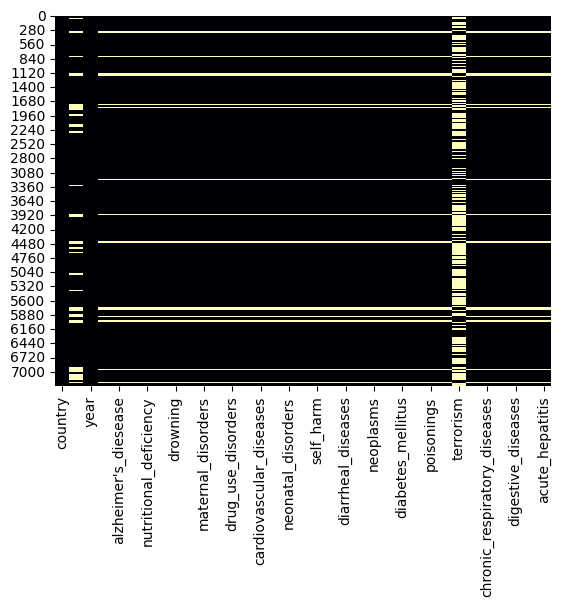

In [4]:
_= sns.heatmap(data.isnull(),cmap = "magma",cbar = False)

With this graph we confirm that some countries do not have data for the whole row when NULL is present.

In [5]:
data[pd.isnull(data.drowning)].country.unique()

array(['Australasia & Oceania', 'Bosnia-Herzegovina',
       'Central America & Caribbean', 'Central Asia', 'Czechoslovakia',
       'East Asia', 'East Germany (GDR)', 'East Timor', 'Eastern Europe',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Hong Kong',
       'International', 'Kosovo', 'Macau', 'Martinique',
       'Middle East & North Africa', 'New Caledonia', 'North America',
       'Serbia-Montenegro', 'South America', 'South Asia',
       'Southeast Asia', 'Sub-Saharan Africa', 'USSR',
       'Wallis and Futuna', 'West Germany (FRG)', 'Western Europe',
       'Western Sahara', 'World (excluding China)', 'Yugoslavia', 'Zaire'],
      dtype=object)

As we will not use any of these country values, we will not change anything with respect to the rows that these values are present. However, ideally, if we worked with some countries like Russia, we would have to check if rows with 'USSR' values did not interfere with anything.

In [6]:
data[pd.isnull(data.code)].country.unique()

array(['African Region (WHO)', 'Australasia & Oceania',
       'Bosnia-Herzegovina', 'Central America & Caribbean',
       'Central Asia', 'East Asia', 'East Asia & Pacific (WB)',
       'East Germany (GDR)', 'East Timor', 'Eastern Europe',
       'Eastern Mediterranean Region (WHO)', 'England',
       'Europe & Central Asia (WB)', 'European Region (WHO)', 'G20',
       'International', 'Latin America & Caribbean (WB)', 'Macau',
       'Middle East & North Africa', 'Middle East & North Africa (WB)',
       'North America', 'North America (WB)', 'Northern Ireland',
       'OECD Countries', 'Region of the Americas (WHO)', 'Scotland',
       'Serbia-Montenegro', 'South America', 'South Asia',
       'South Asia (WB)', 'South-East Asia Region (WHO)',
       'Southeast Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (WB)',
       'Wales', 'West Germany (FRG)', 'Western Europe',
       'Western Pacific Region (WHO)', 'World (excluding China)',
       'World Bank High Income', 'World Bank Lo

We discovered the reason why some country values do not have a code, including all those that we will use in our analysis, do not have a code. However, as this information is not very relevant for analysis, this information is more of a curiosity.

The important thing was to discover that country values have NULL for the entire row, to check if none of the regions we will work on is included.

# Data analysis <a class="anchor" id="third-bullet"></a>

In [7]:
columns_data = data.columns.values
columns_data = list(columns_data[3:])
columns_data.remove("terrorism")

In [8]:
WHO = data.loc[data.country.isin(["African Region (WHO)","Eastern Mediterranean Region (WHO)", "European Region (WHO)",
                                    "Region of the Americas (WHO)","South-East Asia Region (WHO)", "Western Pacific Region (WHO)"])]

The command below shows all the graphs, and was used to get a general idea of the data, but we will highlight some of them.

In [9]:

# for doenca in columns_data:
#      plt.figure(figsize =(14,6))
#      sns.lineplot(data = WHO, y = doenca , x = "year", hue = "country").set_yscale('log')


## Some interesting particular cases <a class="anchor" id="third1-bullet"></a>

### Malaria <a class="anchor" id="third1.1-bullet"></a>

First, let's talk about Malaria, it is very interesting, but in a way predictable, to observe a higher index of deaths in tropical regions (which are almost all because each region encompasses at some level, tropical regions) in comparison with the Europe region. This is mainly due to the fact that transmission occurs through mosquitoes.
<br>
<br>

However, what is more interesting is to see how Europe has practically zeroed the number of cases. The details of how this happened can be found here:<br>
https://www.euro.who.int/__data/assets/pdf_file/0003/307272/Facsheet-malaria-elimination.pdf.

It is important to study what happened in Europe so that it can be used as an example, if applicable, to reduce the number of deaths from Malaria or even its total elimination.

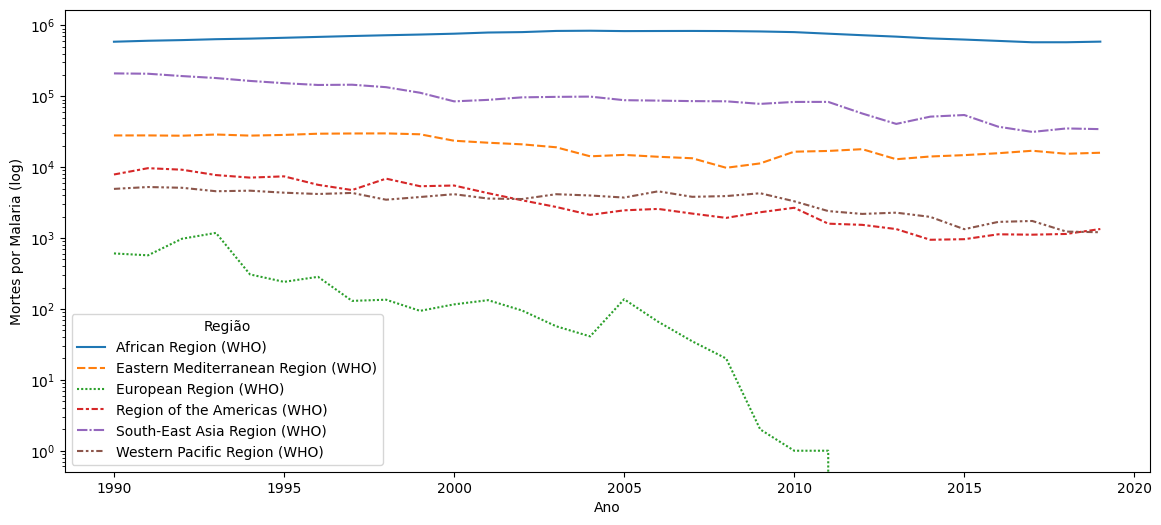

In [10]:
plt.figure(figsize = (14,6))
sns.lineplot(data = WHO, y = "malaria" , x = "year", hue = "country", style = "country").set_yscale('log')
_ = plt.xlabel("Year")
_ = plt.ylabel("Deaths by Malaria (log)")
_ = plt.legend(title = "Region")

### Road Injuries <a class="anchor" id="third1.2-bullet"></a>

Another variable that the Europe Region also stood out for, by its notable decrease when compared to other regions, was deaths caused by traffic accidents.

A brief comment that explains how Europe decreases and intends to decrease even more this number of deaths:<br>
https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(19)30074-X/fulltext

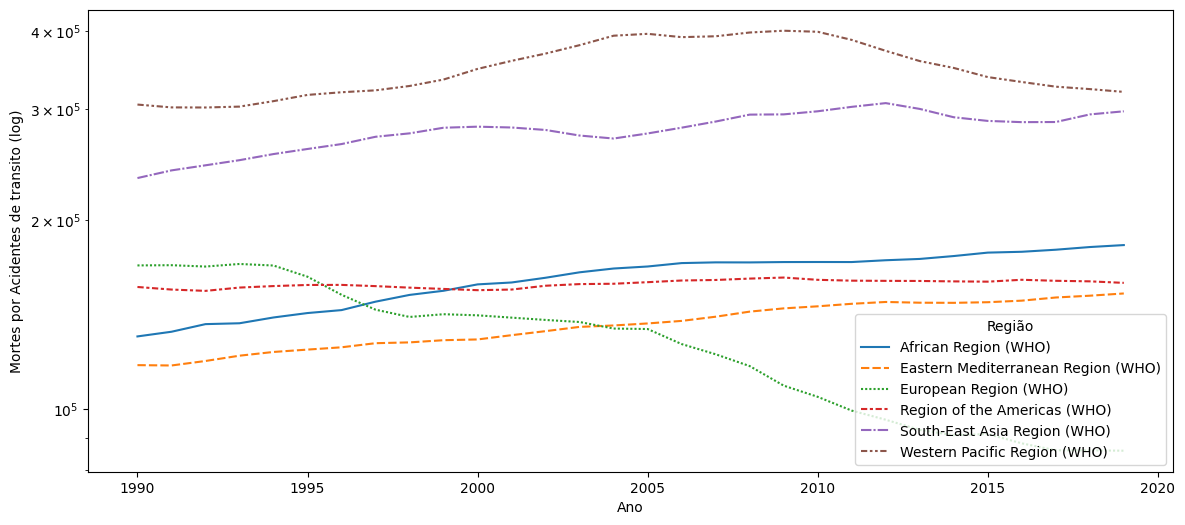

In [11]:
plt.figure(figsize = (14,6))
_ =sns.lineplot(data = WHO, y = "road_injuries" , x = "year", hue = "country", style = "country").set_yscale('log')
_ = plt.xlabel("Year")
_ = plt.ylabel("Deaths by Road_Injuries (log)")
_ = plt.legend(title = "Region")

## Neurodegenerative Diseases <a class="anchor" id="third2-bullet"></a>

So far we have observed cases where Europe has stood out. Now let's see some negative trends not only for this region but also for regions with more developed countries in general (Ex: Western Pacific Region).



### Alzheimer <a class="anchor" id="third2.1-bullet"></a>

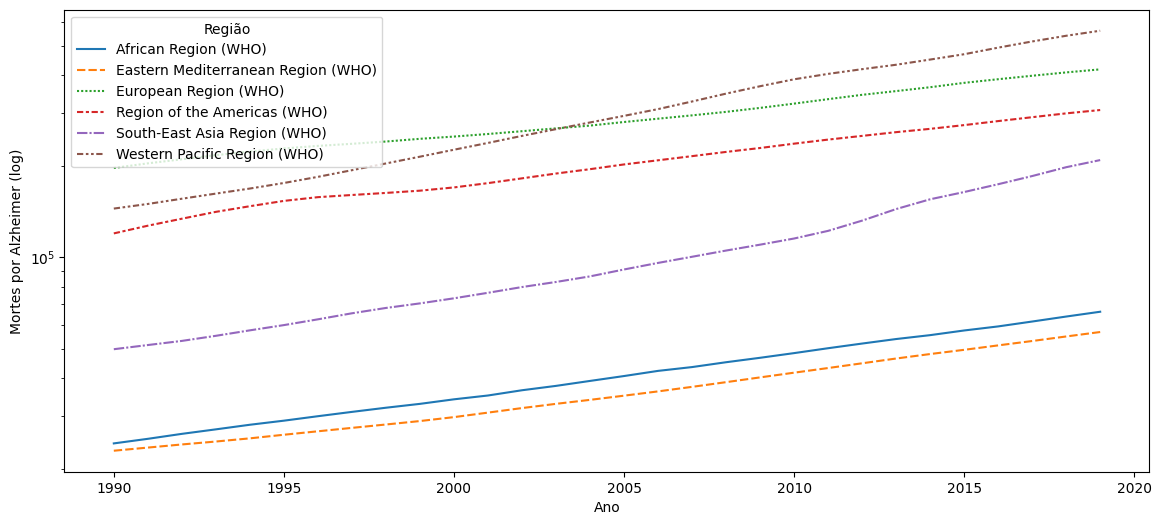

In [12]:
plt.figure(figsize = (14,6))

_ = sns.lineplot( data = WHO, y = "alzheimer's_diesease" , x = "year", hue = "country", style = "country").set_yscale('log')
_ = plt.xlabel("Year")
_ = plt.ylabel("Deaths by Alzheimer's disease (log)")
_ = plt.legend(title = "Region")

### Parkinson  <a class="anchor" id="third2.2-bullet"></a>

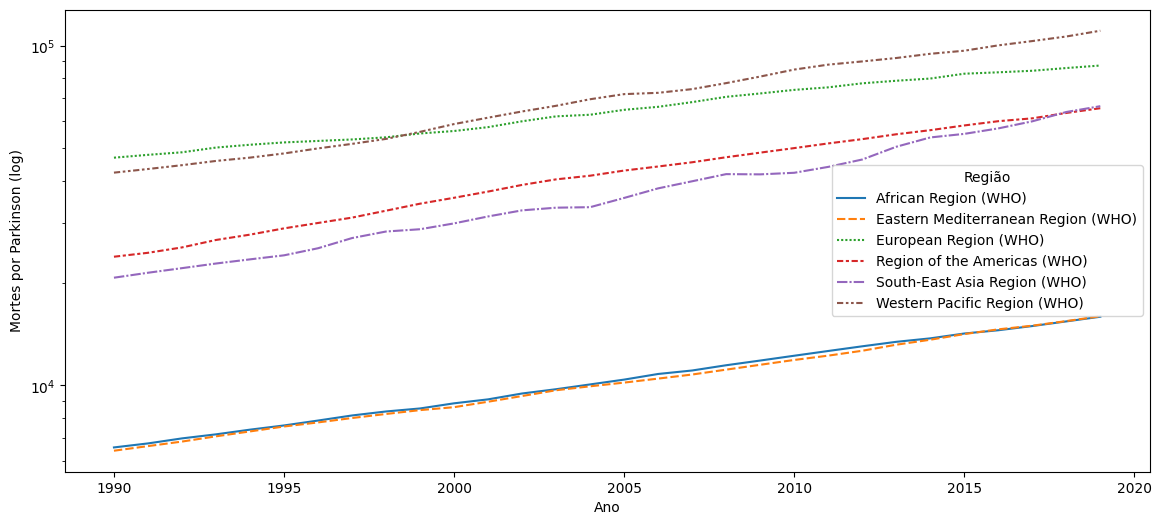

In [13]:
plt.figure(figsize = (14,6))
_ = sns.lineplot( data =WHO, y = "parkinson's_disease" , x = "year", hue = "country", style = "country").set_yscale('log')
_ = plt.xlabel("Year")
_ = plt.ylabel("Deaths by Parkinson's disease (log)")
_ = plt.legend(title = "Region")

## Infectious Diseases <a class="anchor" id="third3-bullet"></a>

We have already analyzed mortality related to neurodegenerative diseases, now let's analyze patterns of infectious diseases.

As we have seen in the case of Malaria, it seems that the regions of Africa (blue) and the Southeast Asia region (purple), which includes countries such as India, Bangladesh and Vietnam, seem to predominate, while other regions such as Europe seem to be lower.

Let's check if this is repeated:

### Tuberculose  <a class="anchor" id="third3.1-bullet"></a>

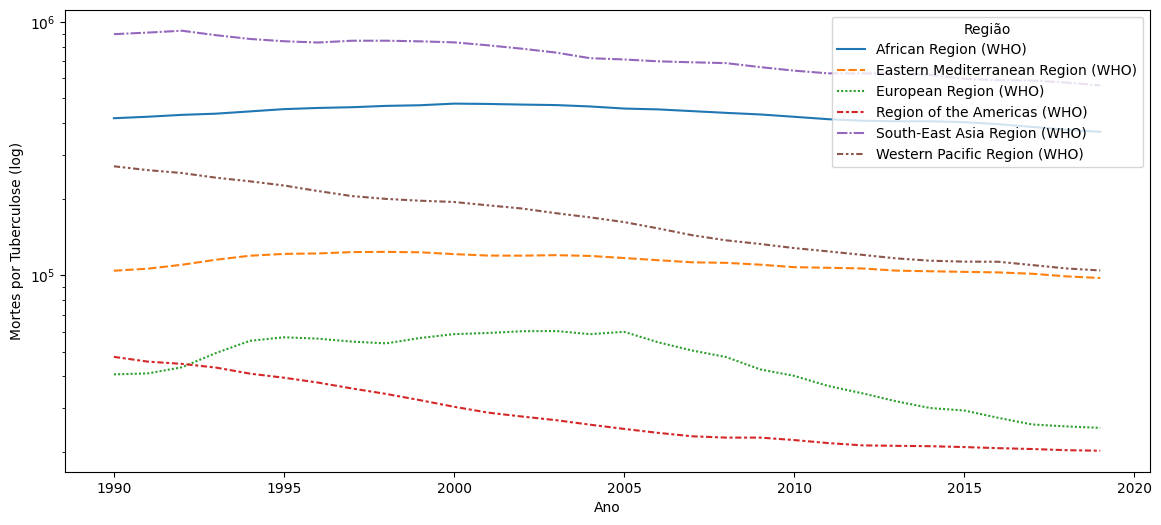

In [14]:
plt.figure(figsize = (14,6))

_ = sns.lineplot( data =WHO, y = "tuberculosis" , x = "year", hue = "country", style = "country" ).set_yscale('log')
_ = plt.xlabel("Year")
_ = plt.ylabel("Deaths by Tuberculosis (log)")
_ = plt.legend(title = "Region")

### HIV/AIDS <a class="anchor" id="third3.2-bullet"></a>

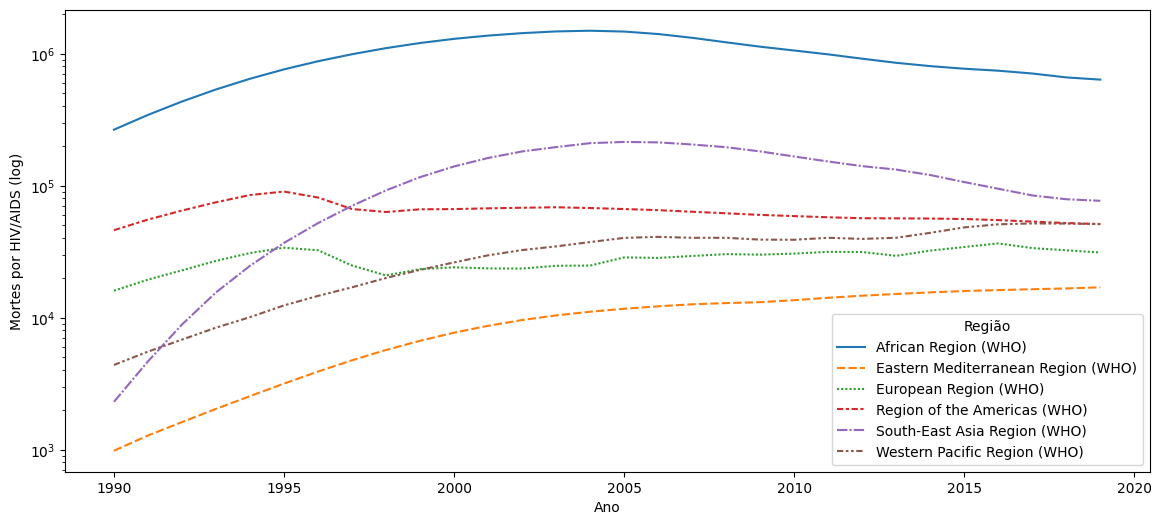

In [15]:
plt.figure(figsize = (14,6))

_= sns.lineplot( data =WHO, y = "hiv/aids" , x = "year", hue = "country", style = "country" ).set_yscale('log')
_ = plt.xlabel("Year")
_ = plt.ylabel("Deaths by HIV/AIDS (log)")
_ = plt.legend(title = "Region")

Apparently, one of the trends in infectious diseases is that the regions of Africa (blue) and the Southeast Asia region (purple) are always on top, while other regions fluctuate, but always stay below these two.

## Bivariate Analysis <a class="anchor" id="third4-bullet"></a>

### Correlation between neurodegenerative diseases? <a class="anchor" id="third4.1-bullet"></a>

When we look at the graphs of neurodegenerative diseases, we can notice that there is a trend among the regions is almost the same, however, let's try to verify this through a scatter plot.

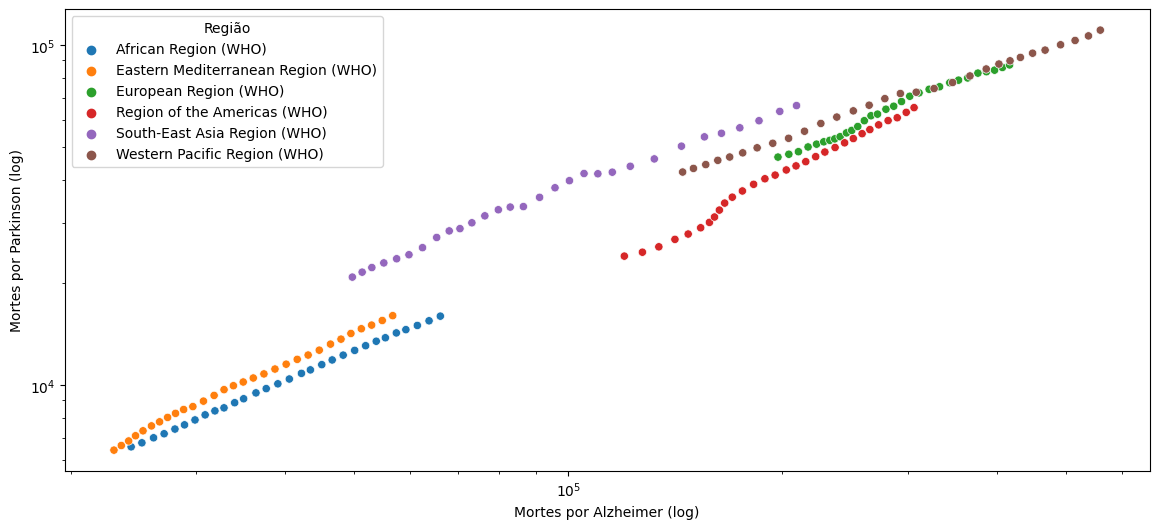

In [16]:
plt.figure(figsize = (14,6))
_ = sns.scatterplot( data = WHO, x = "alzheimer's_diesease", y = "parkinson's_disease", hue = "country").set(xscale="log", yscale="log")
_ = plt.xlabel("Deaths by Alzheimer's (log)")
_ = plt.ylabel("Deaths by Parkinson's (log)")
_ = plt.legend(title = "Region")

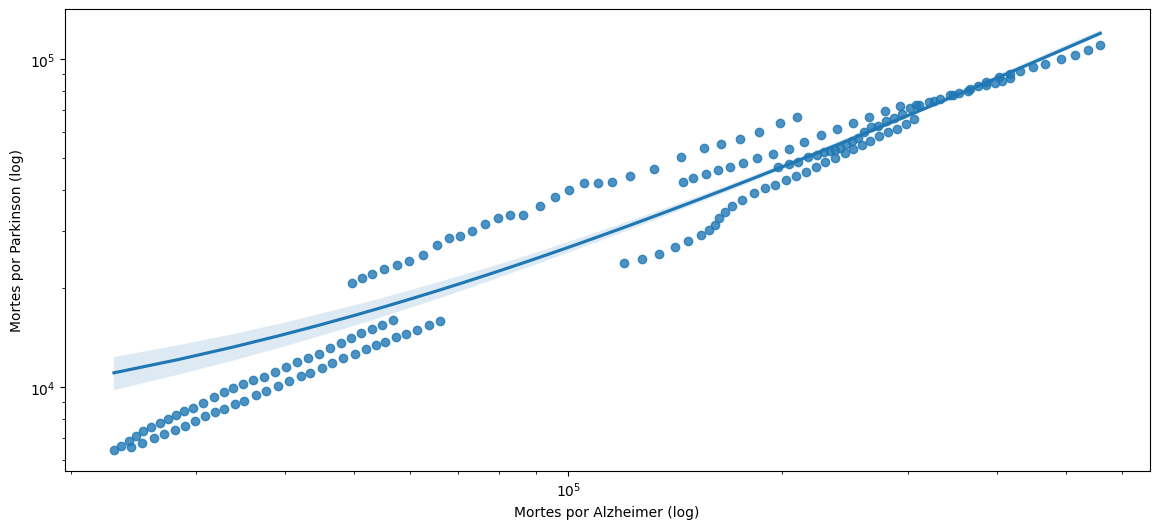

In [17]:
plt.figure(figsize = (14,6))

_ = sns.regplot( data = WHO, x = "alzheimer's_disease", y = "parkinson's_disease", hue = "region").set(xscale="log", yscale="log")
_ = plt.xlabel("Deaths by Alzheimer's disease (log)")
_ = plt.ylabel("Deaths by Parkinson's disease (log)")

It seems that there is a correlation between the number of deaths caused by Alzheimer's disease and Parkinson's disease, probably due to the fact that both are age-related and neurodegenerative diseases.

### Infectious Diseases vs Neurodegenerative Diseases <a class="anchor" id="third4.2-bullet"></a>

Apparently, especially when we look at the Africa region, while it leads in some infectious diseases, it is the one with the least cases in neurodegenerative diseases, which suggests that there may be a pattern that when one is high, the other goes down (inversely proportional). Let's check it:

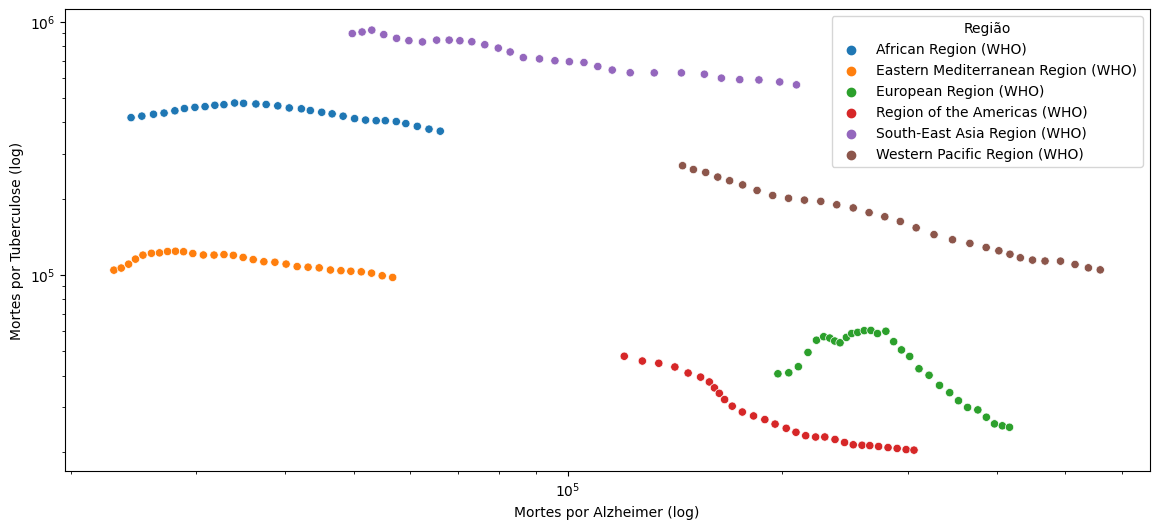

In [18]:
plt.figure(figsize = (14,6))
_ = sns.scatterplot(data = WHO, y = "tuberculosis", x = "alzheimer's_disease", hue = "country").set(xscale="log", yscale="log")
_ = plt.ylabel("Deaths from Tuberculosis (log)")
_ = plt.xlabel("Deaths from Alzheimer's Disease (log)")
_ = plt.legend(title = "Region")

Despite the apparent pattern, it seems that this pattern varies depending on the region, so we will use the lmplot instead of the regplot.

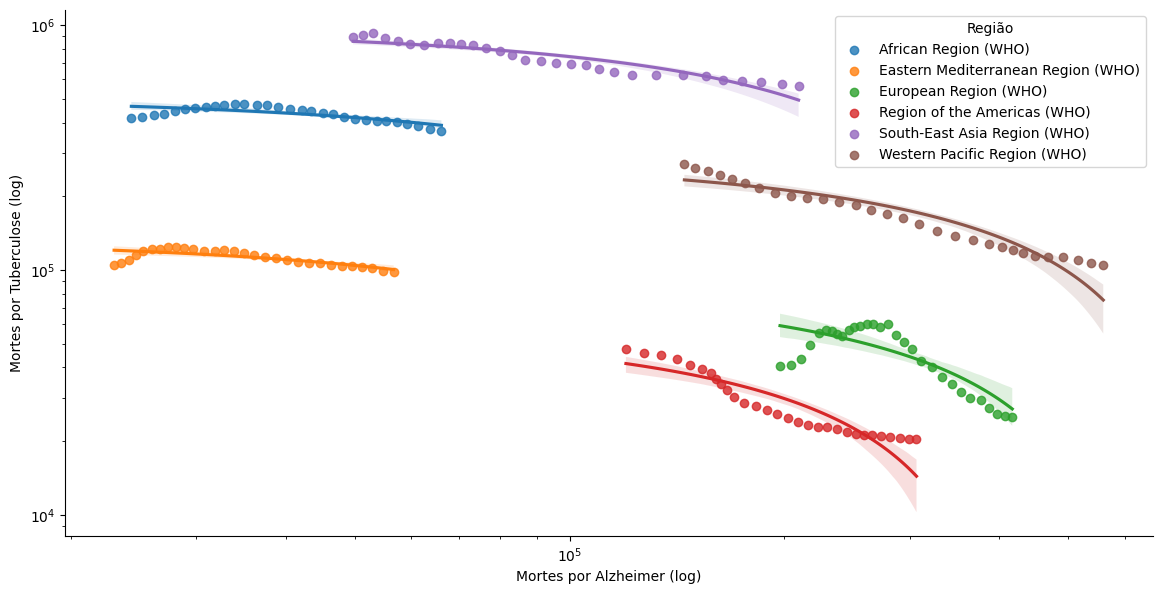

In [19]:

_ = sns.lmplot( data = WHO, y = "tuberculosis", x = "alzheimer's_diesease", hue = "country", height=6, aspect = 2, legend = False).set(xscale="log", yscale="log")
_ = plt.ylabel("Deaths from Tuberculosis (log)")
_ = plt.xlabel("Deaths from Alzheimer's Disease (log)")
_ = plt.legend(title = "Region")


Apparently we can even verify this correlation, although in some regions this is more expressive while in others not.

Let's check for other diseases:

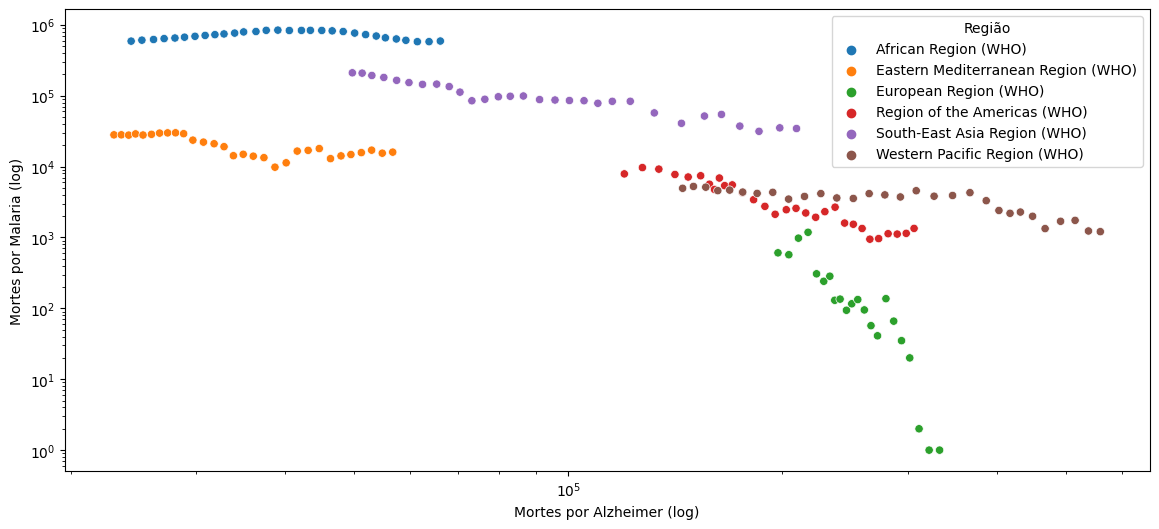

In [20]:
plt.figure(figsize = (14,6))
_ = sns.scatterplot(data = WHO, y = "malaria", x = "alzheimer's_diesease", hue = "country").set(xscale="log", yscale="log")
_ = plt.ylabel("Deaths from Malaria (log)")
_ = plt.xlabel("Deaths from Alzheimer's Disease (log)")
_ = plt.legend(title = "Region")

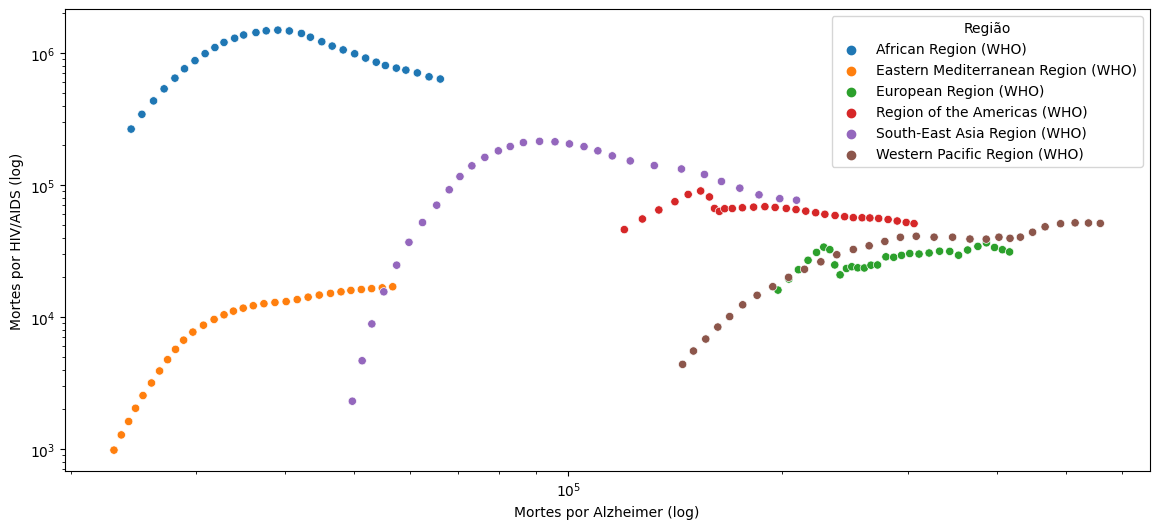

In [21]:
plt.figure(figsize = (14,6))
_ = sns.scatterplot(data = WHO, y = "hiv/aids", x = "alzheimer's_diesease", hue = "country").set(xscale="log", yscale="log")
_ = plt.ylabel("Deaths from HIV/AIDS (log)")
_ = plt.xlabel("Deaths from Alzheimer's Disease (log)")
_ = plt.legend(title = "Region")


Different from what we expected, the other infectious diseases do not present a pattern similar to that of tuberculosis, which suggests that that inversely proportional pattern is exclusive to **tuberculosis** and is not repeated for all diseases.

### All correlations <a class="anchor" id="third4.3-bullet"></a>

In the future, if we wanted to have a better parameter to look for correlations, we could use the command:

In [22]:
WHO.corr()

/tmp/ipykernel_91/280360452.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  WHO.corr()


,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,maternal_disorders,hiv/aids,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
year,1.000000,-0.160276,0.399652,0.400480,-0.326586,-0.038039,-0.259223,-0.005983,-0.131861,0.044294,...,0.551820,-0.057999,-0.331558,NaN,0.057862,0.063038,0.257100,0.211290,-0.151840,-0.188997
meningitis,-0.160276,1.000000,-0.641397,-0.625051,0.785638,0.933624,0.026823,-0.168305,0.844198,0.846383,...,-0.338347,0.096746,0.834917,NaN,-0.042109,-0.198859,-0.044732,-0.093175,0.366077,0.417423
alzheimer's_diesease,0.399652,-0.641397,1.000000,0.973375,-0.530939,-0.485070,0.126345,0.143530,-0.643648,-0.395211,...,0.616831,0.420317,-0.549466,NaN,0.293944,0.405245,0.294583,0.403317,-0.104490,-0.455054
parkinson's_disease,0.400480,-0.625051,0.973375,1.000000,-0.475240,-0.524450,0.286918,0.077336,-0.553067,-0.435668,...,0.707009,0.432486,-0.510218,NaN,0.419492,0.564390,0.491366,0.582974,0.051845,-0.287212
nutritional_deficiency,-0.326586,0.785638,-0.530939,-0.475240,1.000000,0.579916,0.338946,-0.062096,0.907902,0.446565,...,-0.125941,-0.045783,0.992564,NaN,0.099140,0.015911,0.176272,0.173525,0.441370,0.706060
malaria,-0.038039,0.933624,-0.485070,-0.524450,0.579916,1.000000,-0.199944,-0.048935,0.629527,0.951212,...,-0.379119,0.176760,0.658417,NaN,-0.168214,-0.347810,-0.216073,-0.238318,0.213893,0.083418
drowning,-0.259223,0.026823,0.126345,0.286918,0.338946,-0.199944,1.000000,-0.200390,0.308783,-0.230048,...,0.429117,0.433293,0.272465,NaN,0.816680,0.881498,0.709269,0.723898,0.514175,0.618417
interpersonal_violence,-0.005983,-0.168305,0.143530,0.077336,-0.062096,-0.048935,-0.200390,1.000000,-0.187425,0.016187,...,0.224168,-0.363737,-0.041676,NaN,-0.187444,-0.187219,-0.099873,-0.009610,-0.285380,-0.308065
maternal_disorders,-0.131861,0.844198,-0.643648,-0.553067,0.907902,0.629527,0.308783,-0.187425,1.000000,0.527740,...,-0.095331,-0.087920,0.894336,NaN,0.141218,0.040375,0.281731,0.222877,0.530577,0.802057
hiv/aids,0.044294,0.846383,-0.395211,-0.435668,0.446565,0.951212,-0.230048,0.016187,0.527740,1.000000,...,-0.305055,0.170003,0.526971,NaN,-0.144960,-0.319146,-0.185110,-0.208419,0.173563,0.008334
